# Tutorial to process the digital image in the pixel-wise fashion

Noted that while you can achieve almost anything with the pixel-wise operation. The well-established digital image processing operations can be done much more efficiently (computationally) via the functions of all famous image processing libraries (Pillow, OpenCV, Scikit Image). 

## Before the operation 

To run through the 2D image, we usually create a double _for-loop_ to go through the image. You can regard the image as a matrix. Personally, I like to go through it row-by-row first, and col-by-col. 

Before all that, we need to know the size (number of rows and columns) of the matrix.

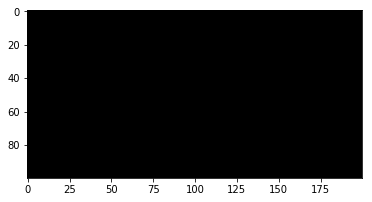

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

row = 100
col = 200
mat = np.zeros((row, col, 3), np.uint8)   # Create the blank matrix with the data type of unsigned integer 8 bit. 
plt.imshow(mat)

## Now we can create the loop

This is the simplest loop. It does not do anything just yet. 

In [2]:
for loop_col in range(col):
    for loop_row in range(row):
        single_pixel_r = mat[loop_row, loop_col, 0]
        single_pixel_g = mat[loop_row, loop_col, 1]
        single_pixel_b = mat[loop_row, loop_col, 2]

# We can make the loop even shorter by looping through the 3 channels. 
for loop_col in range(col):
    for loop_row in range(row):
        for loop_ch in range(3):
            single_pixel = mat[loop_row, loop_col, loop_ch]

## Assign random value to each pixel

To demonstrate how we can manipulate the image pixel by pixel. We will assign a random number between 0 - 255 to the image using the loop. Let's see the result. 

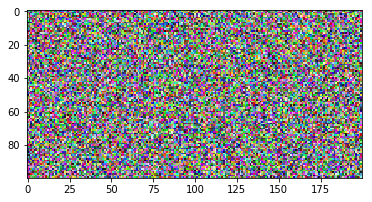

In [3]:
import random 

# We can make the loop even shorter by looping through the 3 channels. 
for loop_col in range(col):
    for loop_row in range(row):
        for loop_ch in range(3):
            mat[loop_row, loop_col, loop_ch] = random.randint(0, 255)

# Show the result 
plt.imshow(mat)

## Add white square in the middle
We can add some condition inside the loop. This is called kernel. The kernel will perform the task we want. 

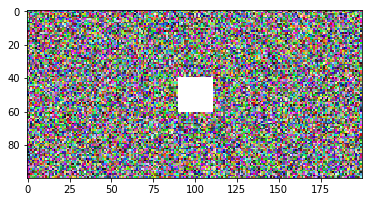

In [4]:
square_size = 10
center_row = int(row / 2)
center_col = int(col / 2)

col_boundary = (center_col - square_size, center_col + square_size)
row_boundary = (center_row - square_size, center_row + square_size)

# We can make the loop even shorter by looping through the 3 channels. 
for loop_col in range(col):
    for loop_row in range(row):
        for loop_ch in range(3):
            if ((loop_col >= col_boundary[0]) and (loop_col <= col_boundary[1]) 
                and (loop_row >= row_boundary[0]) and (loop_row <= row_boundary[1])):
                mat[loop_row, loop_col, loop_ch] = 255
                     
plt.imshow(mat)

## Turn it into a function 
Keep repeating this pattern seems a bit inefficient and may introduce errors along the way. In Python, you can wrap these loops into a function, and pass in some variable that could be changed. 

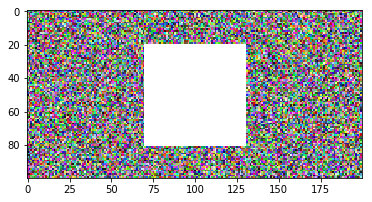

In [5]:
def add_white_square(image, square_size = 10):
    # Measure the image size
    [row, col, _] = image.shape
    
    center_row = int(row / 2)
    center_col = int(col / 2)

    col_boundary = (center_col - square_size, center_col + square_size)
    row_boundary = (center_row - square_size, center_row + square_size)
    
    for loop_col in range(col):
        for loop_row in range(row):
            for loop_ch in range(3):
                if ((loop_col >= col_boundary[0]) and (loop_col <= col_boundary[1]) 
                    and (loop_row >= row_boundary[0]) and (loop_row <= row_boundary[1])):
                    mat[loop_row, loop_col, loop_ch] = 255
    return image

# After the function is written, we can call it. 

mat_big_sq = add_white_square(mat, 30)
plt.imshow(mat_big_sq)

## Do the same thing, but with 1-layerd (grayscale) image
Just remove the innter for-loop dedicated to the color channel. 

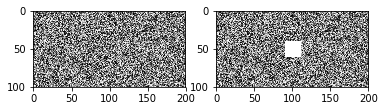

In [6]:
gray_img = np.zeros((100, 200), np.uint8)
gray_img_sq = gray_img.copy()
for loop_col in range(col):
    for loop_row in range(row):
        rand_val = random.randint(0, 255)
        gray_img[loop_row, loop_col] = rand_val
        gray_img_sq[loop_row, loop_col] = rand_val
        
        if ((loop_col >= col_boundary[0]) and (loop_col <= col_boundary[1]) 
                    and (loop_row >= row_boundary[0]) and (loop_row <= row_boundary[1])):
                    gray_img_sq[loop_row, loop_col] = 255

plt.subplot(121)
plt.imshow(gray_img, cmap='gray')

plt.subplot(122)
plt.imshow(gray_img_sq, cmap='gray')

## Conclusion 

In this notebook, we did: 
1. Create matrix (image) (both RGB color and grayscale) using `numpy`. 
2. Manipulate the created matrix by assigning random value to it using Python's `random` module. 
3. Add the white square to the image using the same pixel-wise operation when we assign the random value. 